In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Datartrwdki1317.csv')
print(df)

      tahun         nama_provinsi nama_kabupaten_kota   nama_kecamatan  \
0      2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
1      2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
2      2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
3      2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT   
4      2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT   
...     ...                   ...                 ...              ...   
1330   2017  PROVINSI DKI JAKARTA       JAKARTA TIMUR         CIPAYUNG   
1331   2017  PROVINSI DKI JAKARTA       JAKARTA TIMUR         CIPAYUNG   
1332   2017  PROVINSI DKI JAKARTA       JAKARTA TIMUR         CIPAYUNG   
1333   2017  PROVINSI DKI JAKARTA       JAKARTA TIMUR         CIPAYUNG   
1334   2017  PROVINSI DKI JAKARTA       JAKARTA TIMUR         CIPAYUNG   

      nama_kelurahan  jumlah_rt  jumlah_rw  
0        P. PANGGANG         29          5  
1          P. KELAPA 

In [4]:
available_kabkota = df['nama_kabupaten_kota'].unique()
print (available_kabkota)

['KAB.ADM.KEP.SERIBU' 'JAKARTA PUSAT' 'JAKARTA UTARA' 'JAKARTA BARAT'
 'JAKARTA SELATAN' 'JAKARTA TIMUR']


In [5]:
count_kabkota = df.groupby(['nama_kabupaten_kota']).size().reset_index(name='counts')
print (count_kabkota)

  nama_kabupaten_kota  counts
0       JAKARTA BARAT     280
1       JAKARTA PUSAT     220
2     JAKARTA SELATAN     325
3       JAKARTA TIMUR     325
4       JAKARTA UTARA     155
5  KAB.ADM.KEP.SERIBU      30


In [6]:
rt=df.groupby(['nama_kabupaten_kota','nama_kecamatan','nama_kelurahan'])['jumlah_rt'].sum().reset_index()
print(rt)

    nama_kabupaten_kota   nama_kecamatan      nama_kelurahan  jumlah_rt
0         JAKARTA BARAT       CENGKARENG    CENGKARENG BARAT        906
1         JAKARTA BARAT       CENGKARENG    CENGKARENG TIMUR       1132
2         JAKARTA BARAT       CENGKARENG        DURI KOSAMBI        843
3         JAKARTA BARAT       CENGKARENG               KAPUK       1110
4         JAKARTA BARAT       CENGKARENG  KEDAUNG KALI ANGKE        494
..                  ...              ...                 ...        ...
262  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT           P. TIDUNG        145
263  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT      P. UNTUNG JAWA         45
264  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR          P. HARAPAN         75
265  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR           P. KELAPA        155
266  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR         P. PANGGANG        145

[267 rows x 4 columns]


In [7]:
import pandas
import sklearn
import scipy
import numpy
import matplotlib
pandas.__version__, sklearn.__version__,scipy.__version__,numpy.__version__,matplotlib.__version__

('1.3.2', '1.2.0', '1.8.1', '1.21.2', '3.4.3')

In [8]:
import matplotlib.pyplot as plt
import numpy
from pandas.plotting import scatter_matrix
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets

In [27]:
iris = datasets.load_iris()
iris

In [10]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
dataset = pandas.DataFrame(data= numpy.c_[iris['data']],
                          columns= iris['feature_names'])
dataset['class'] = numpy.c_[list(map((lambda x: iris.target_names[x]), iris.target))]

In [14]:
dataset.shape

(150, 5)

In [17]:
dataset.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
dataset.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

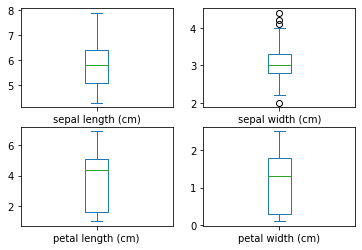

In [20]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

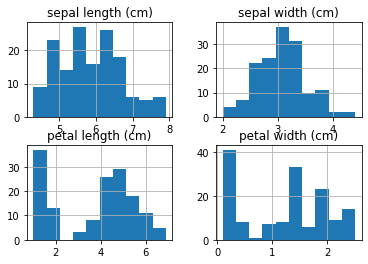

In [21]:
dataset.hist()
plt.show()

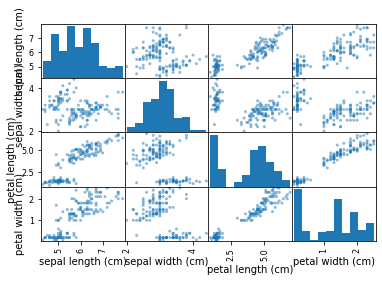

In [24]:
scatter_matrix(dataset)
plt.show()